# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [10]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = "/content/drive/MyDrive/foodhub_order.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [87]:
#Get the number of rows and columns of the dataset.
df.shape

(1898, 11)

#### Observations:
The dataset contains 1,898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [88]:
#Display summary information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1898 non-null   int64  
 1   customer_id             1898 non-null   int64  
 2   restaurant_name         1898 non-null   object 
 3   cuisine_type            1898 non-null   object 
 4   cost_of_the_order       1898 non-null   float64
 5   day_of_the_week         1898 non-null   object 
 6   rating                  1898 non-null   object 
 7   food_preparation_time   1898 non-null   int64  
 8   delivery_time           1898 non-null   int64  
 9   total_delivery_time     1898 non-null   int64  
 10  delivery_time_category  1898 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 163.2+ KB


#### Observations:
The dataset consists of three data types: float, int, and object.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [89]:
#Check for missing values in each column of the dataset.
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0
total_delivery_time,0


#### Observations:
The dataset has no missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [90]:
# Statistical summary for the 'food_preparation_time'
food_prep_time_summary = df["food_preparation_time"].describe()

# Extracting the minimum, average (mean), and maximum values
min_time = food_prep_time_summary["min"]
avg_time = food_prep_time_summary["mean"]
max_time = food_prep_time_summary["max"]

print(f"Minimum preparation time: {min_time}")
print(f"Average preparation time: {avg_time}")
print(f"Maximum preparation time: {max_time}")

Minimum preparation time: 20.0
Average preparation time: 27.371970495258168
Maximum preparation time: 35.0


#### Observations:
* The minimum preparation time is 20.0 minutes, indicating that the shortest time
it takes for food to be prepared once an order is placed is 20 minutes.

* The average preparation time is approximately 27.37 minutes, suggesting that, on average, food preparation takes about 27 minutes across all orders.

* The maximum preparation time is 35.0 minutes, indicating that the longest time it takes for food to be prepared once an order is placed is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [91]:
#Get the count of each unique rating in the dataset.
df.rating.value_counts()

,count
rating,
Missing,736
5.0,588
4.0,386
3.0,188


#### Observations:
736 orders have not been rated in the dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

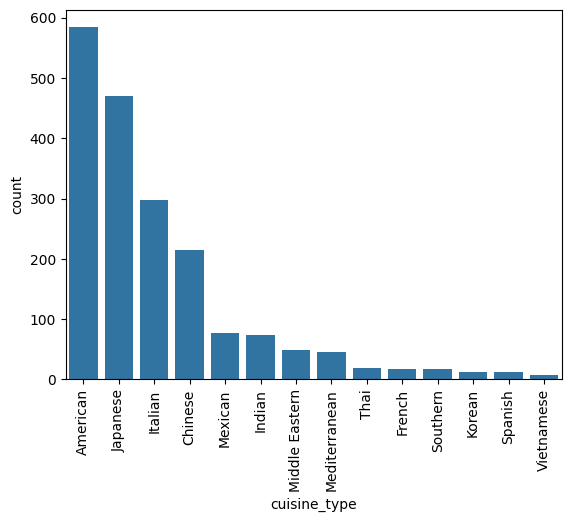

In [92]:
# Create a count plot for the number of occurrences of each cuisine type
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.show()

#### Observations:

American cuisine is the most popular, followed by Japanese and Italian. These three have much higher numbers than others. Chinese and Mexican cuisines are also common, while Vietnamese, Spanish, and Korean cuisines are less represented. This shows that most people prefer a few main types of cuisine.

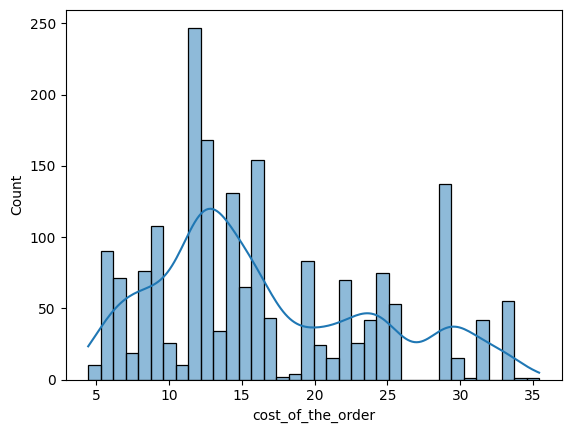

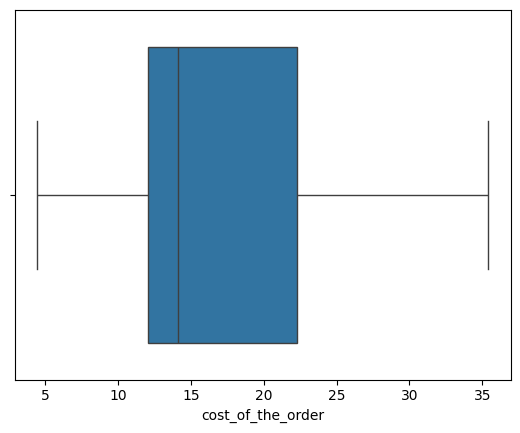

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


In [26]:
# Histogram for cost_of_the_order
sns.histplot(data=df,x='cost_of_the_order',bins= 35, kde=True);
plt.show()

# Boxplot for cost_of_the_order
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

# Generate descriptive statistics for the cost of the order
df['cost_of_the_order'].describe()

#### Observations:

In general, most orders have costs ranging from 4.47 to 22.30, though there are a few orders with significantly higher costs that extend beyond this range.

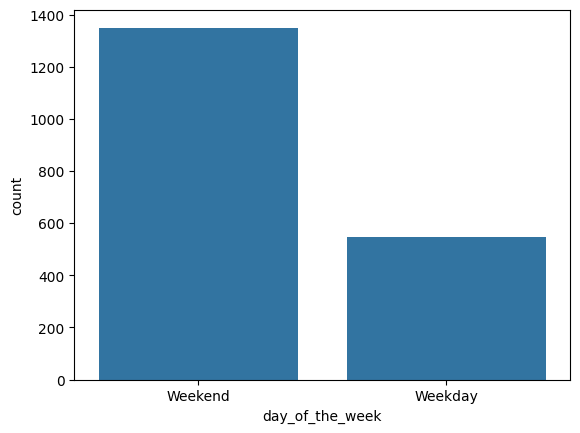

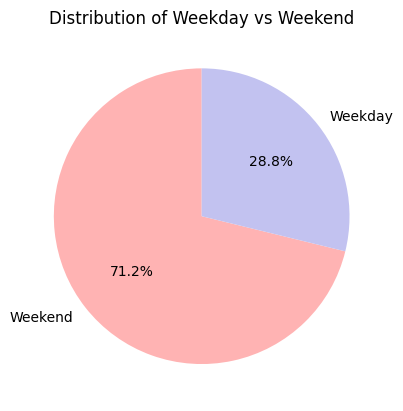

In [34]:
# Create a countplot to show how orders are distributed between weekdays and weekends
sns.countplot(data=df,x='day_of_the_week');
plt.show()

# Get the count of orders for each day (weekday vs weekend)
day_of_week_counts = df['day_of_the_week'].value_counts()

# Create a pie chart to show the percentage of orders on weekdays vs weekends
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffb3b3', '#c2c2f0'])
plt.title('Distribution of Weekday vs Weekend')
plt.show()

#### Observations:

Most orders, 71.2%, are placed on the weekend, while 28.8% are during the weekday. This shows that people are more likely to order on weekends, possibly due to having more free time or higher demand for food during those days.

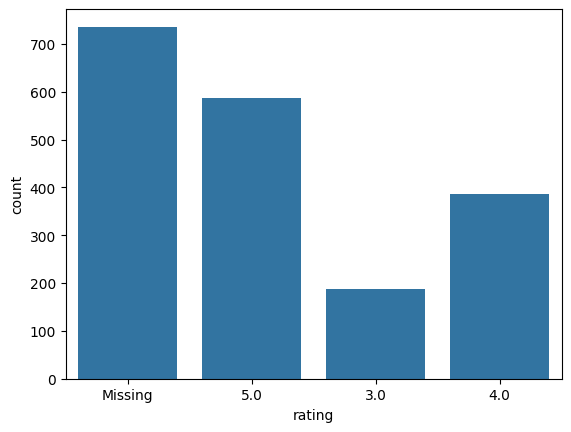

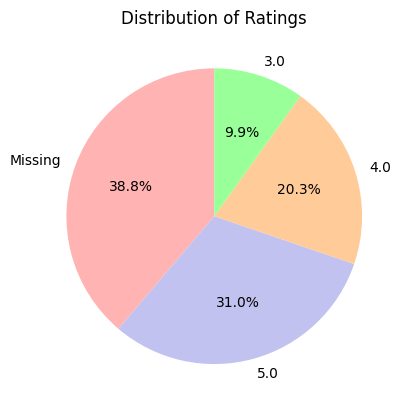

In [93]:
# Create a countplot to show the distribution of ratings
sns.countplot(data=df,x='rating')
plt.show()

# Get the value counts for rating
rating_counts = df['rating'].value_counts()

# Create a pie chart to show the percentage distribution of ratings
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffb3b3', '#c2c2f0', '#ffcc99', '#99ff99'])

# Add a title to the pie chart
plt.title('Distribution of Ratings')
plt.show()

#### Observations:

The distribution of ratings reveals that 9.9% of customers gave a rating of 3, 20.3% gave a rating of 4, and 31.0% gave a rating of 5. Interestingly, 38.8% of customers did not provide a rating at all, suggesting that more than 700 customers did not submit feedback.

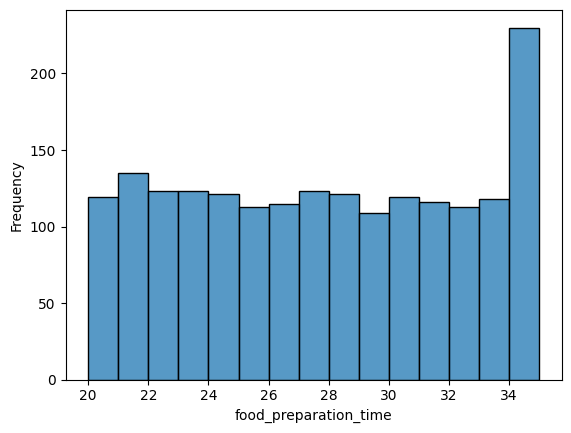

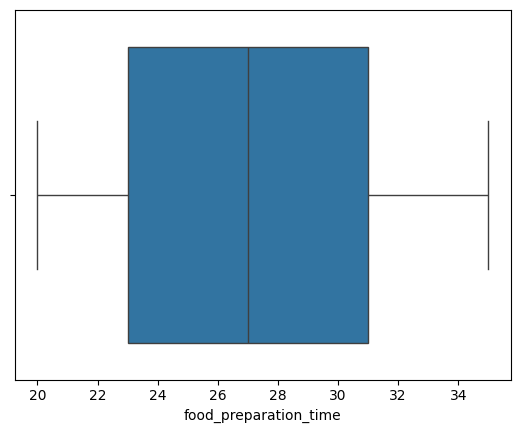

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


In [22]:
# Create a histogram to show the distribution of food preparation times
sns.histplot(data=df,x='food_preparation_time', binwidth=1, stat="frequency")
plt.show()

# Create a boxplot to show the spread and outliers of food preparation times
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

# Get summary statistics for food preparation time
df['food_preparation_time'].describe()

#### Observations:

The food preparation time is fairly evenly distributed across different intervals. However, there is a noticeable peak at the highest value (34–35 minutes), suggesting that a significant number of orders require the maximum preparation time.

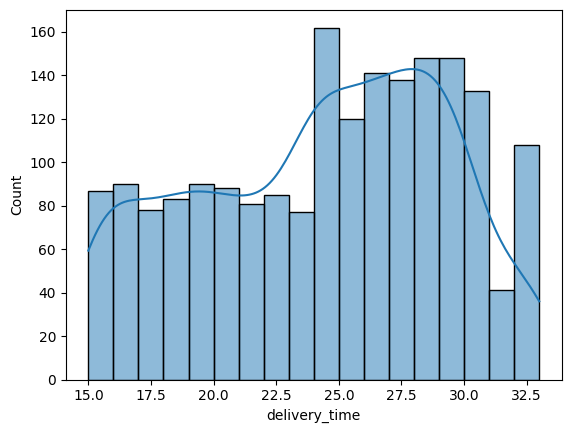

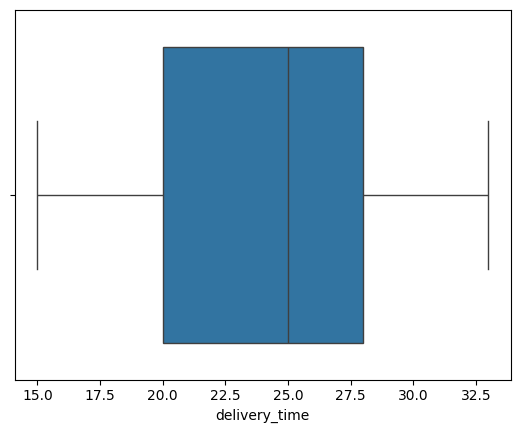

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


In [37]:
# Create a histogram to show the distribution of delivery times
sns.histplot(data=df,x='delivery_time', binwidth = 1, kde=True, stat="count")
plt.show()


# Create a boxplot to show the spread and outliers of delivery times
sns.boxplot(data=df,x='delivery_time')
plt.show()

# Get summary statistics for delivery time
df['delivery_time'].describe()

#### Observations:

The average delivery time is 24.16 minutes, with most deliveries happening between 15 and 28 minutes. The shortest delivery time is 15 minutes, and the longest is 33 minutes. About 25% of deliveries are under 20 minutes, and half of the deliveries are made in 25 minutes or less. The data shows a fairly consistent delivery time with some outliers on the longer side.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [38]:
#Gets the top 5 restaurants with the highest number of orders.
df['restaurant_name'].value_counts().nlargest(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The five restaurants with the highest number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

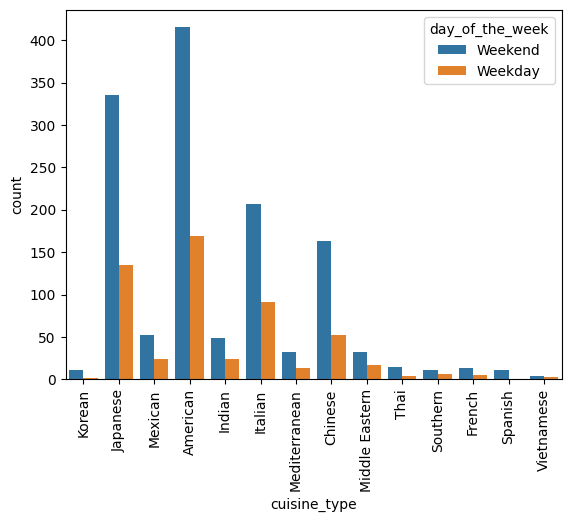

In [94]:
#Plot cuisine types across weekdays and weekends."
sns.countplot(data=df,x='cuisine_type',hue = 'day_of_the_week')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90);
plt.show()

In [32]:
#Gets the most popular cuisine on weekends
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().nlargest(1)


,count
cuisine_type,
American,415


#### Observations:
Based on the dataset analysis, the most popular cuisine on weekends is American cuisine, with 415 orders.

This indicates that American food is a preferred choice during weekends, likely due to its convenience, popularity, and association with casual dining and fast food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [37]:
#Calculate the percentage of orders costing more than 20 dollars.
percentage_above_20 = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
percentage_above_20

29.24130663856691

#### Observations:
Approximately 29.24% of the orders in the dataset cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [40]:
#Calculate the mean delivery time for all orders.
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes, indicating an average delivery duration of just over 24 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [42]:
#Get the top 3 customers with the highest number of orders.
df['customer_id'].value_counts().nlargest(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 customer IDs with the most frequent orders are:

ID 52832 with 13 orders

ID 47440 with 10 orders

ID 83287 with 9 orders

These customers will receive the 20% discount vouchers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


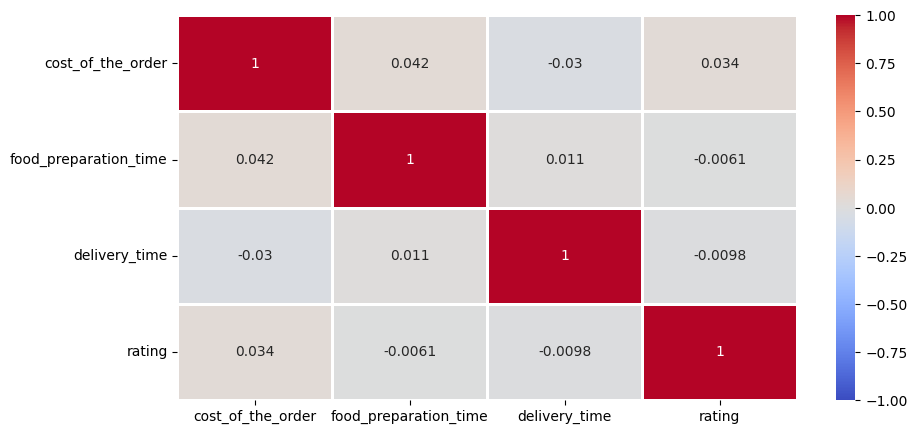

In [54]:
# Convert ratings, set errors to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Select the numerical columns to analyze
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']

# Set the figure size
plt.figure(figsize=(10,5))

# Create a heatmap to show correlations between the selected variables
sns.heatmap(df[col_list].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=2)

plt.show()

#### Observations:

The four numerical variables—cost_of_the_order, food_preparation_time, delivery_time, and rating—show no clear correlation. This suggests that these factors are independent and do not directly affect one another.

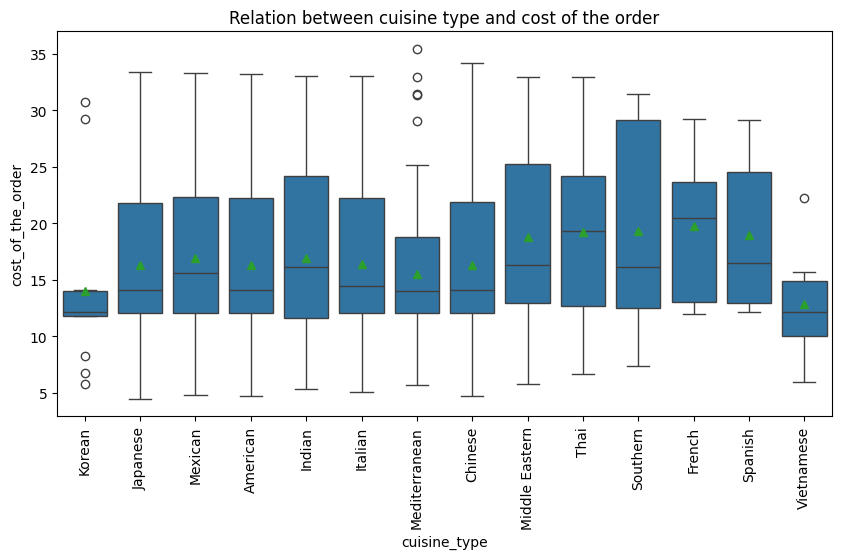

In [57]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a box plot for cuisine type vs. order cost
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', showmeans=True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Relation between Cuisine Type and Cost of the Order')

plt.show()


#### Observations:

Most cuisines have order costs between 10 to 25 in value, with a few outliers that are probably just due to different eating habits. On average, the cost of an order is under 20 in value for all cuisines. Korean, Mediterranean, and Vietnamese cuisines have some outliers. Korean and Vietnamese are the cheapest, while Mediterranean tends to have the most expensive orders.

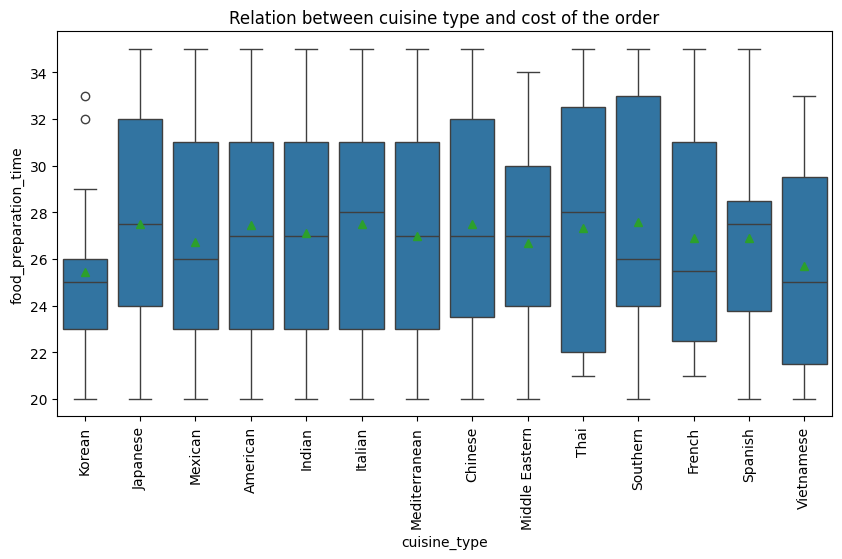

In [58]:
# Set the figure size
plt.figure(figsize=(10, 5))

# Create a box plot for cuisine type vs. food preparation time
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', showmeans=True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a title to the plot
plt.title('Relation between Cuisine Type and Food Preparation Time')

plt.show()

#### Observations:

On average, the preparation time for all types of cuisine is under 28 minutes, with most cuisines having preparation times ranging from 20 to 35 minutes. Korean food, in particular, tends to be the fastest to prepare, often taking less time than other cuisines. However, there are some outliers within Korean cuisine, where certain dishes take significantly longer than others. This suggests that while most orders are prepared relatively quickly, there can still be variation based on the dish or preparation method.

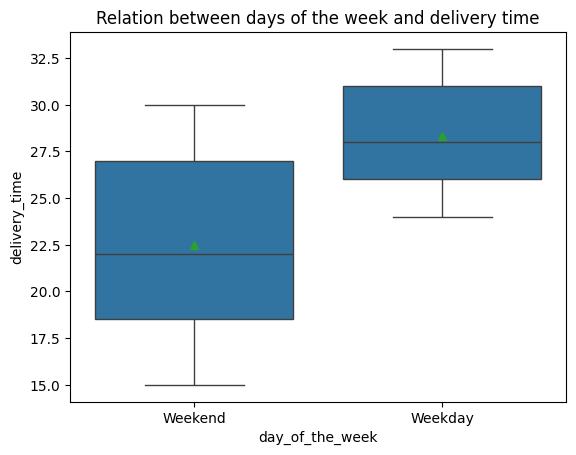

In [60]:
# Create a box plot for day of the week vs. delivery time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', showmeans=True)

# Add a title to the plot
plt.title('Relation between Days of the Week and Delivery Time')

plt.show();

#### Observations:

Delivery times on weekends are generally quicker than on weekdays, possibly due to less traffic. The delivery time range is also shorter on weekdays. Even though 71.2% of orders come in on the weekend, deliveries are still faster compared to weekdays. This could mean that despite the higher volume of weekend orders, there are fewer delays.

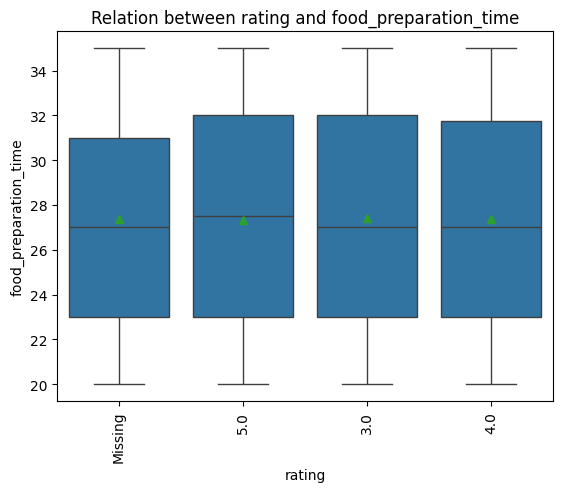

In [75]:
# Fill missing values in the 'rating' column with the label 'Missing'
df['rating'] = df['rating'].fillna('Missing')

# Create a box plot for rating vs. food preparation time
sns.boxplot(data=df, x='rating', y='food_preparation_time', showmeans=True)

# Add a title to the plot
plt.title('Relation between Rating and Food Preparation Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()


#### Observations:

The distributions across ratings 3.0, 4.0, and 5.0 seem quite similar, with medians and interquartile ranges closely aligned. This suggests that food preparation time may not significantly impact ratings. If ratings were influenced by preparation time, we might expect lower ratings to have longer times or more variability.

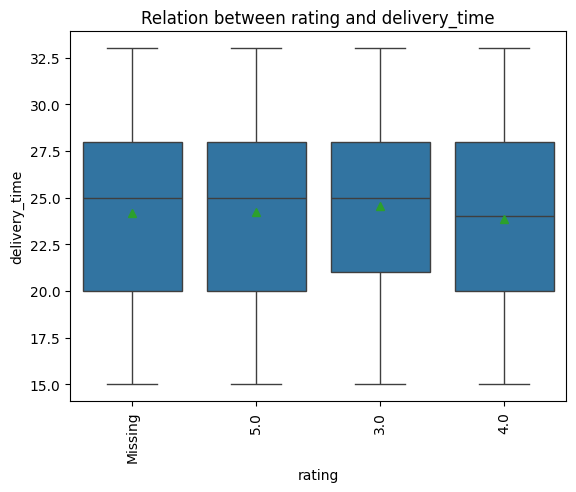

In [80]:
# Create a box plot for rating vs. delivery time
sns.boxplot(data=df, x='rating', y='delivery_time', showmeans=True)

# Add a title to the plot
plt.title('Relation between Rating and Delivery Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show();

#### Observations:

The delivery time is similar across all ratings, suggesting that it doesn’t have a significant impact on how customers rate their experience.

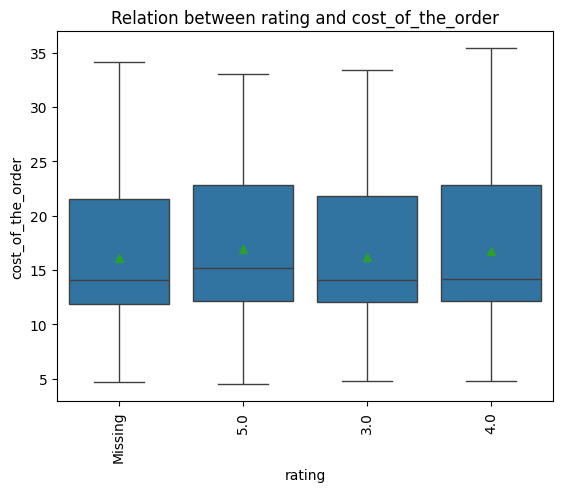

In [83]:
# Create a box plot for rating vs. cost of the order
sns.boxplot(data=df, x='rating', y='cost_of_the_order', showmeans=True)

# Add a title to the plot
plt.title('Relation between Rating and Cost of the Order')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()

#### Observations:

The order costs are fairly consistent across all ratings, even for the "Missing" category. Since the median and overall distribution are similar, it suggests that cost doesn’t have a significant impact on ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [13]:
# Convert rating to numeric, setting 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Get the average rating and total count for each restaurant
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['mean', 'count'])

# Filter restaurants with an average rating above 4 and more than 50 ratings
qualified_restaurants = restaurant_stats.query("mean > 4 and count > 50")

print(qualified_restaurants)

                               mean  count
restaurant_name                           
Blue Ribbon Fried Chicken  4.328125     64
Blue Ribbon Sushi          4.219178     73
Shake Shack                4.278195    133
The Meatball Shop          4.511905     84


#### Observations:
The four restaurants that met the criteria for the promotional offer were Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken, and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [35]:
# Calculate commission using lambda function
df['commission'] = df['cost_of_the_order'].apply(lambda cost: cost * 0.25 if cost > 20 else (cost * 0.15 if cost > 5 else 0))

# Get net revenue
net_revenue = df['commission'].sum()

print(net_revenue)

6166.303


#### Observations:
The total revenue from the 1898 orders was $6166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

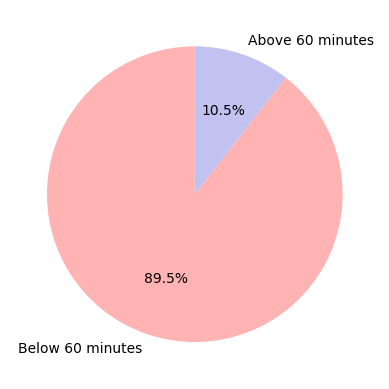

In [84]:
# Calculate total delivery time by adding food preparation time and delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Categorize orders based on total delivery time
df['delivery_time_category'] = df['total_delivery_time'].apply(lambda x: 'Above 60 minutes' if x > 60 else 'Below 60 minutes')

# Get the count of each delivery time category
delivery_time_counts = df['delivery_time_category'].value_counts()

# Plot a pie chart to show the distribution of delivery time categories
plt.pie(delivery_time_counts, labels=delivery_time_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffb3b3', '#c2c2f0']);

plt.show()

#### Observations:
About 10.5% of the orders took longer than 60 minutes to be delivered. 75% of the orders were delivered in less than an hour.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

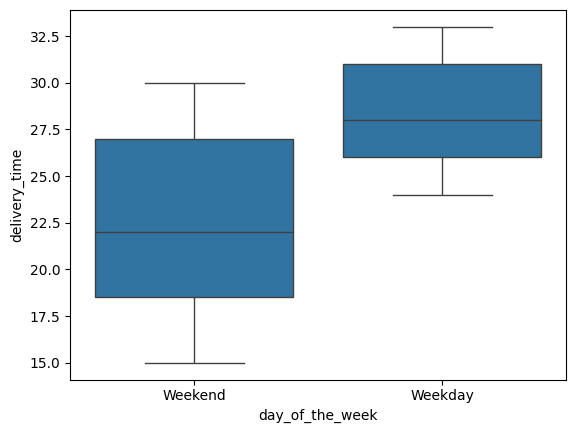

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [85]:
# Create a boxplot to visualize delivery times by day of the week
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

# Calculate the mean delivery time for each day of the week
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time_by_day)

#### Observations:
The mean delivery time for orders on weekdays is 28.34 minutes, while on weekends, it is 22.47 minutes. This indicates that, on average, orders take longer to be delivered during weekdays than on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Higher Order Volume on Weekends – There is a noticeable increase in orders on weekends, suggesting that customers prefer food delivery during their free time.

* Most Popular Cuisines – American, Japanese, Italian, and Chinese are the top choices, with each having over 200 orders.

* Consistent Customer Preferences – Customers order the same types of food on weekdays and weekends.

* Most Orders Go to a Few Restaurants – 15 restaurants receive more than half of all orders, showing strong customer loyalty or higher ratings.

* Many Orders Are Not Rated – 40% of orders don’t get a rating, making it harder to measure customer satisfaction.

* Majority of Orders Are Affordable – 70% of orders cost less than $20, meaning customers prefer budget-friendly options.

* Low Customer Retention – 65% of customers only order once, showing the need for better engagement strategies.

* Delivery Delays on Weekdays – While weekend deliveries are faster, weekday orders take an average of 6 minutes longer.

* Long Delivery Times for Some Orders – 10% of deliveries take over an hour, likely due to external factors such as traffic and restaurant location.

* Some Restaurants Struggle – 28% of restaurants received only one order, indicating potential issues with visibility or customer trust.


### Recommendations:

*  Encourage Customer Ratings – Offer small rewards or discounts to get more people to leave reviews.

* Help Restaurants Improve Ratings – Show restaurants why ratings matter and help them enhance their service.

* Increase Repeat Orders – Use promotions, discounts, and loyalty programs to keep customers coming back.

* Add More Popular Cuisine Options – Partner with more restaurants offering American, Japanese, Italian, and Chinese dishes.

* Support Struggling Restaurants – Give smaller restaurants better visibility and marketing support to attract more orders.

* Offer More Budget-Friendly Meals – Work with restaurants to create affordable meal deals under $20.

* Speed Up Delivery Times – Partner with restaurants closer to high-demand areas to reduce wait times.

* Identify and Fix Delivery Delays – Analyze traffic patterns, restaurant prep times, and courier efficiency to improve delivery speeds, especially on weekdays.

* Gather More Data – Study what influences restaurant ratings and customer choices to improve business strategies.

---